    ==============================================================================================

## Importing the DataFrames
- ``` df = pd.read_pickle("file_name.pkl")```  --> create 1 df from a pkl file

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.min_rows", 0) 
pd.set_option("display.max_rows", 30) 
pd.__version__

'1.4.4'

In [7]:
db_qu = pd.read_pickle("clean_Tables\Merged_c.pkl")

In [8]:
db_qu.columns

Index(['ORD_ID', 'ord_CreatDate', 'ord_TotlPaid', 'OL_ID', 'ol_ProdQnty',
       'ol_ProdUntPr', 'ol_ProcessDate', 'PRO_SKU', 'pro_Name', 'pro_Desc',
       'pro_Pr', 'pro_InStock', 'pro_Type'],
      dtype='object')

    ==============================================================================================

## Answer Bussines questions


- Concerns
    A. The main investors pointed out the company’s recent quarterly results showed
        1.  increase in orders placed but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.
    B. Questions
        1. How products should be classified into different categories to simplify reports and analysis.
        2. What is the distribution of product prices across different categories.
        3. How many products are being discounted.
        4. How big are the offered discounts as a percentage of the product prices. --> tmp_dis_per

### Discount Variation with Product Types and Time


In [9]:
#drop_list=["ORD_ID","ord_TotlPaid","ol_ProdQnty","ord_CreatDate","OL_ID","ol_ProcessDate","pro_InStock"]

In [10]:

db_proTimDis=round(
    db_qu
    .groupby([db_qu.pro_Type,db_qu.ol_ProcessDate.dt.strftime("%Y-%m")])
    .agg( AvgUnitPrice      =("pro_Pr","mean")
         ,AvgDisUnitPrice   =("ol_ProdUntPr","mean")
         ,NumUniqProducts   =("PRO_SKU",pd.Series.nunique)
         ,NumUniqOrders     =("ORD_ID",pd.Series.nunique)
         ,TotalRevenue      =("ord_TotlPaid","sum")
         ,TotalSoldProdQnty =("ol_ProdQnty","sum")
         ,ProNameSample     =("pro_Name","max")
         ,ProDescSample     =("pro_Desc","max")
         )
    #.nlargest(10,"ol_ProdQnty")
    .reset_index()
)
db_proTimDis= (
    db_proTimDis
    .assign(AvgDiscoutPercent = np.where((db_proTimDis.AvgUnitPrice== 0.0)
                                   ,100
                                   ,round(((db_proTimDis.AvgUnitPrice-db_proTimDis.AvgDisUnitPrice)/db_proTimDis.AvgUnitPrice)*100,2)
                                   ))
    )


In [11]:
db_proTimDis

,pro_Type,ol_ProcessDate,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,ProNameSample,ProDescSample,AvgDiscoutPercent
0,0,2017-01,569.0,602.0,4,4,2406.0,4,Apple iPhone 6s Plus 128GB Gold,New iPhone SE with 4-inch screen 64 free GB.,-5.80
1,0,2017-02,519.0,498.0,2,2,995.0,2,Apple iPhone 64GB Silver,New iPhone SE with 4-inch screen 64 free GB.,4.05
2,0,2017-05,749.0,879.0,1,1,949.0,1,Apple iPhone 6s Plus 128GB Space Gray,New iPhone 6s Plus 128GB Libre.,-17.36
3,0,2017-06,749.0,879.0,1,1,879.0,1,Apple iPhone 6s Plus 128GB Rose Gold,New iPhone 6s Plus 128GB Libre.,-17.36
4,0,2017-07,749.0,803.0,2,2,2604.0,2,Apple iPhone 6s Plus 128GB Silver,New iPhone 6s Plus 128GB Libre.,-7.21
5,0,2017-10,749.0,608.0,1,1,628.0,1,Apple iPhone 6s Plus 128GB Rose Gold,New iPhone 6s Plus 128GB Libre.,18.83
6,0,2017-12,100.0,92.0,1,1,377.0,1,Elgato Video Capture Mac,Mac USB analog video recorder hardware.,8.00
7,0,2018-02,25.0,22.0,1,1,65.0,1,Dodocool Sports Wireless Stereo Headphones Black,Wireless stereo headphones with remote control...,12.00
8,"1,02E+12",2017-06,2522.0,2401.0,23,32,90068.0,33,"Apple Macbook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,4.80
9,"1,02E+12",2017-07,2608.0,2442.0,33,65,172841.0,67,"Like new - Apple MacBook Pro 13 ""Core i5 2GHz ...",Refurbished MacBook Pro 13-inch 2GHz Core i5 w...,6.37


In [ ]:
#db_proTimDis.to_csv("test.csv")

In [12]:
round(db_proTimDis.describe())

,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,AvgDiscoutPercent
count,1405.0,1405.0,1405.0,1405.0,1405.0,1405.0,1405.0
mean,412.0,350.0,15.0,41.0,17366.0,49.0,19.0
std,763.0,679.0,25.0,71.0,34626.0,87.0,18.0
min,6.0,5.0,1.0,1.0,13.0,1.0,-30.0
25%,47.0,35.0,2.0,4.0,1005.0,4.0,8.0
50%,114.0,84.0,7.0,14.0,4347.0,15.0,16.0
75%,461.0,387.0,17.0,49.0,17500.0,55.0,26.0
max,6209.0,5571.0,286.0,633.0,424682.0,759.0,91.0


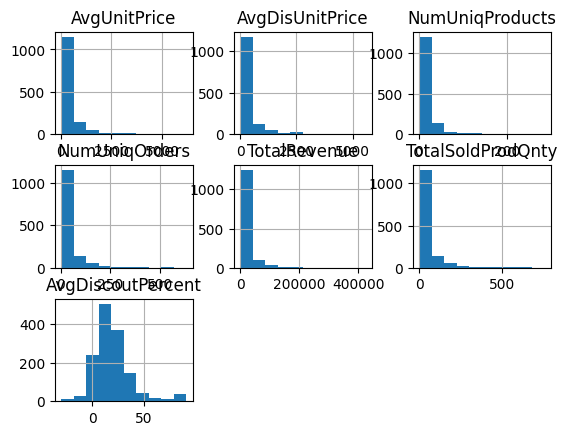

In [13]:
db_proTimDis.hist();

- Get Top 10s

In [ ]:
db_proTimDis.sample(3)

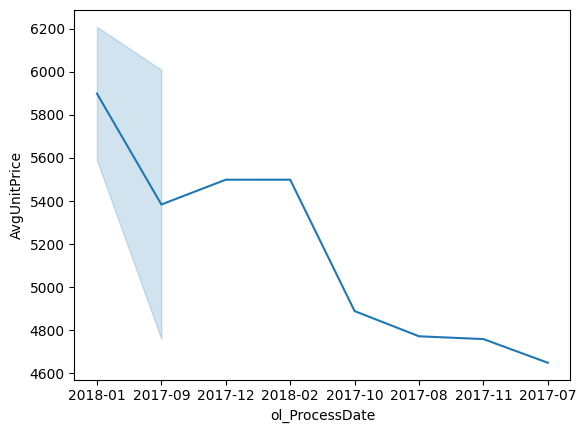

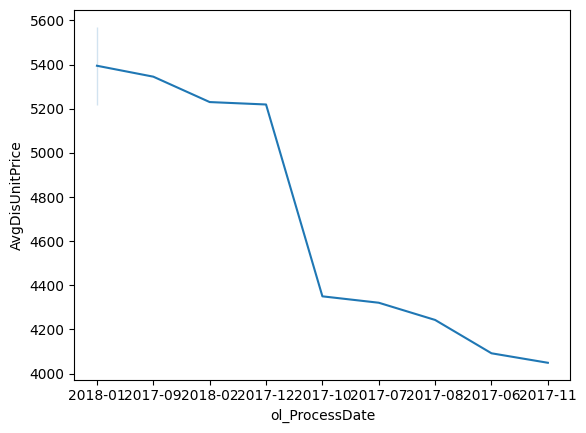

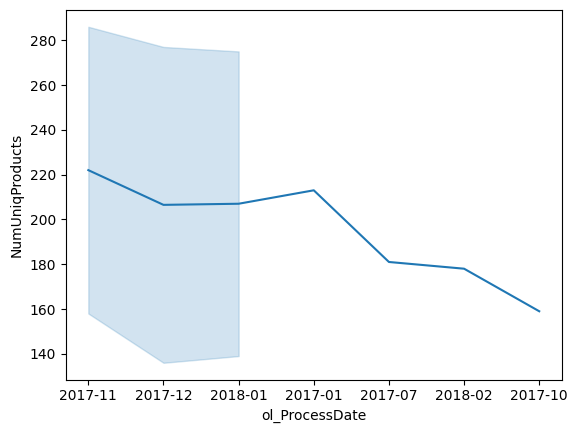

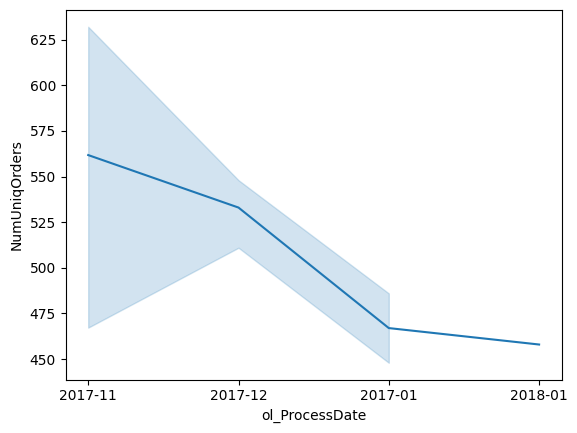

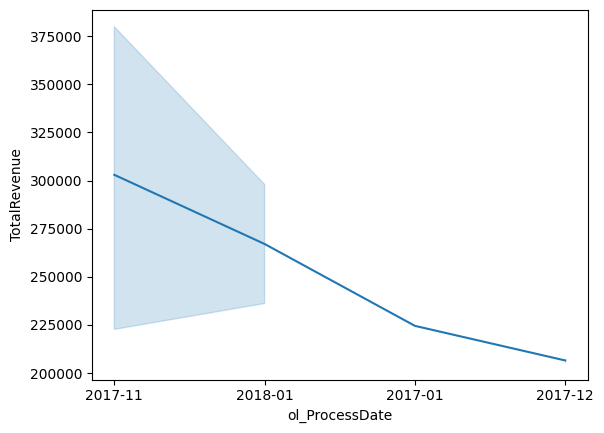

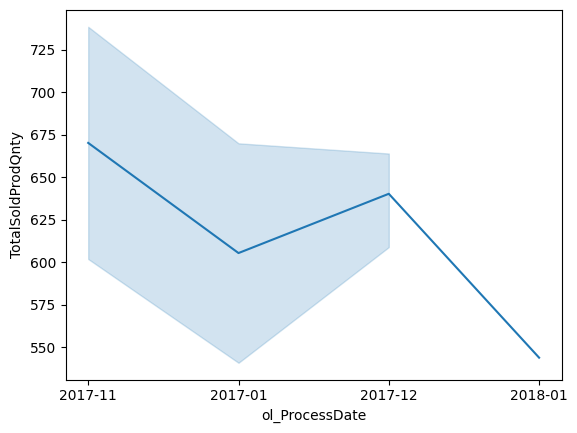

TypeError: Column 'ProNameSample' has dtype object, cannot use method 'nlargest' with this dtype

In [16]:
for col in db_proTimDis.columns:
    if col == "pro_Type"or col == "ol_ProcessDate":
        continue
    df=db_proTimDis.nlargest(10, columns=col)
    sns.lineplot(data=df
                ,x="ol_ProcessDate"
                ,y=col)
    plt.show()
    

In [ ]:
# g=sns.relplot(data=db_types
#             ,x="AvgUnitPrice"
#             ,y= "AvgDiscoutPercent"
#             )
sns.relplot(data=db_proTimDis
            ,kind="line"
            ,x="AvgDiscoutPercent"
            ,y="TotalRevenue"
            #,hue="TotalSoldProdQnty"
            #,style="event",
)


In [ ]:
pd.set_option("display.max_colwidth", 5000) 
db_proTimDis.sample(3)